In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

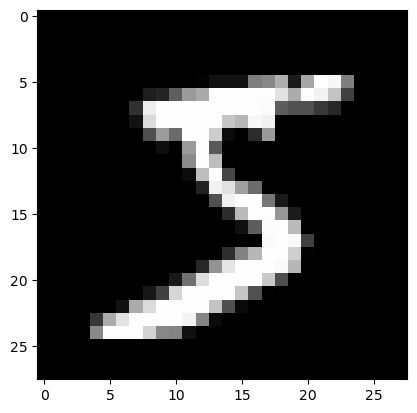

In [3]:
plt.imshow(x_train[0], cmap='gray')
plt.show() 

In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')

In [7]:
x_test = x_test.astype('float32')
x_train /= 255 # Each image has Intensity from 0 to 255
x_test /= 255

In [8]:
num_classes = 10
y_train = np.eye(num_classes)[y_train] # Return a 2-D array with ones on the diagonal and zeros elsewhere.
y_test = np.eye(num_classes)[y_test] 

In [9]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))

In [10]:
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) #returns a sequence of another vectors of dimension 512
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', # for a multi-class classification problem
optimizer=RMSprop(),
metrics=['accuracy'])

In [12]:
batch_size = 128 # batch_size argument is passed to the layer to define a batch size for the inputs.
epochs = 10
history = model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1, # verbose=1 will show you an animated progress bar eg. [==========]
validation_data=(x_test, y_test))


Epoch 1/10
469/469 [==============================] - 8s 15ms/step - loss: 0.2557 - accuracy: 0.9216 - val_loss: 0.1418 - val_accuracy: 0.9554
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1069 - accuracy: 0.9677 - val_loss: 0.0784 - val_accuracy: 0.9776
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0748 - accuracy: 0.9771 - val_loss: 0.0697 - val_accuracy: 0.9768
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0566 - accuracy: 0.9821 - val_loss: 0.0627 - val_accuracy: 0.9811
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0484 - accuracy: 0.9850 - val_loss: 0.0674 - val_accuracy: 0.9796
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0411 - accuracy: 0.9869 - val_loss: 0.0609 - val_accuracy: 0.9827
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0340 - accuracy: 0.9889 - val_loss: 0.0644 - val_accuracy: 0.9835

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06945062428712845
Test accuracy: 0.9825999736785889


In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

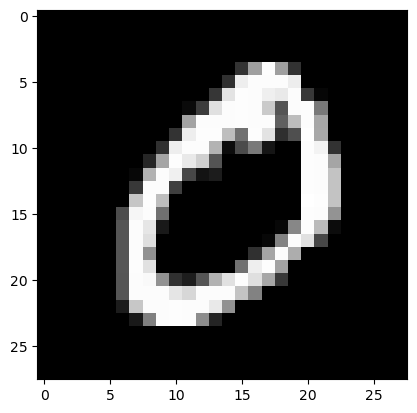

1/1 [==============================] - 0s 114ms/step
Predicted class: 0


In [15]:
#verification of an image
plt.imshow(x_train[1], cmap='gray')
plt.show() 
input_image = x_train[1].reshape(1, 784)
predictions = model.predict(input_image)
predicted_class = np.argmax(predictions[0])
print("Predicted class:", predicted_class)